### **IMPORTING PACKAGEGS**

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.cm as cm

# Suppress all warnings
warnings.filterwarnings('ignore')

### **DATA LOADING**

In [2]:
#loads the dataset
Bitcoin_df=pd.read_csv('/content/btcusd_1-min_data.csv')

In [3]:
Bitcoin_df.head(5)

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


### **DATA MANIPULATION AND CLEANING**

In [4]:
import pandas as pd
# Convert Unix timestamp to datetime
Bitcoin_df['Timestamp'] = pd.to_datetime(Bitcoin_df['Timestamp'], unit='s')

# Add a new column for MM/DD/YYYY format
Bitcoin_df['Date'] = Bitcoin_df['Timestamp'].dt.strftime('%m/%d/%Y')

# Display the first few rows
print(Bitcoin_df.head(5))

            Timestamp  Open  High   Low  Close  Volume        Date
0 2012-01-01 10:01:00  4.58  4.58  4.58   4.58     0.0  01/01/2012
1 2012-01-01 10:02:00  4.58  4.58  4.58   4.58     0.0  01/01/2012
2 2012-01-01 10:03:00  4.58  4.58  4.58   4.58     0.0  01/01/2012
3 2012-01-01 10:04:00  4.58  4.58  4.58   4.58     0.0  01/01/2012
4 2012-01-01 10:05:00  4.58  4.58  4.58   4.58     0.0  01/01/2012


In [5]:
import pandas as pd

# Extract useful time features
Bitcoin_df['Hour'] = Bitcoin_df['Timestamp'].dt.hour  # Hour of the day
Bitcoin_df['DayOfWeek'] = Bitcoin_df['Timestamp'].dt.day_name()  # Monday, Tuesday, etc.
Bitcoin_df['Month'] = Bitcoin_df['Timestamp'].dt.month  # 1 to 12
Bitcoin_df['Year'] = Bitcoin_df['Timestamp'].dt.year  # Year
# Display the first few rows
print(Bitcoin_df.head(5))

            Timestamp  Open  High   Low  Close  Volume        Date  Hour  \
0 2012-01-01 10:01:00  4.58  4.58  4.58   4.58     0.0  01/01/2012    10   
1 2012-01-01 10:02:00  4.58  4.58  4.58   4.58     0.0  01/01/2012    10   
2 2012-01-01 10:03:00  4.58  4.58  4.58   4.58     0.0  01/01/2012    10   
3 2012-01-01 10:04:00  4.58  4.58  4.58   4.58     0.0  01/01/2012    10   
4 2012-01-01 10:05:00  4.58  4.58  4.58   4.58     0.0  01/01/2012    10   

  DayOfWeek  Month  Year  
0    Sunday      1  2012  
1    Sunday      1  2012  
2    Sunday      1  2012  
3    Sunday      1  2012  
4    Sunday      1  2012  


In [6]:
# Check for missing values in all columns
print(Bitcoin_df.isnull().sum())


Timestamp    0
Open         0
High         0
Low          0
Close        1
Volume       1
Date         0
Hour         0
DayOfWeek    0
Month        0
Year         0
dtype: int64


In [7]:
# Forward fill missing timestamps with the previous valid timestamp
Bitcoin_df['Timestamp'] = Bitcoin_df['Timestamp'].fillna(method='ffill')

# Check if the missing values are handled
print(Bitcoin_df.isnull().sum())

Timestamp    0
Open         0
High         0
Low          0
Close        1
Volume       1
Date         0
Hour         0
DayOfWeek    0
Month        0
Year         0
dtype: int64


**EDA**

1.Basic Statistics

In [8]:
# Display basic statistics for numerical columns
print(Bitcoin_df.describe())

                           Timestamp          Open          High  \
count                        1645398  1.645398e+06  1.645398e+06   
mean   2013-07-25 18:53:40.354986496  2.403539e+02  2.405404e+02   
min              2012-01-01 10:01:00  3.800000e+00  3.800000e+00   
25%              2012-10-13 01:50:15  1.162000e+01  1.162000e+01   
50%              2013-07-25 18:39:30  1.183300e+02  1.183600e+02   
75%              2014-05-07 11:28:45  4.468600e+02  4.470000e+02   
max              2015-02-17 04:18:00  1.163000e+03  1.163000e+03   
std                              NaN  2.635744e+02  2.638200e+02   

                Low         Close        Volume          Hour         Month  \
count  1.645398e+06  1.645397e+06  1.645397e+06  1.645398e+06  1.645398e+06   
mean   2.401539e+02  2.403520e+02  7.080557e+00  1.150161e+01  6.309584e+00   
min    2.000000e+00  3.800000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    1.162000e+01  1.162000e+01  0.000000e+00  5.000000e+00  3.000000

**1️⃣ Bitcoin Price Trends & Volatility**

**Q1: How has Bitcoin price evolved over time?**

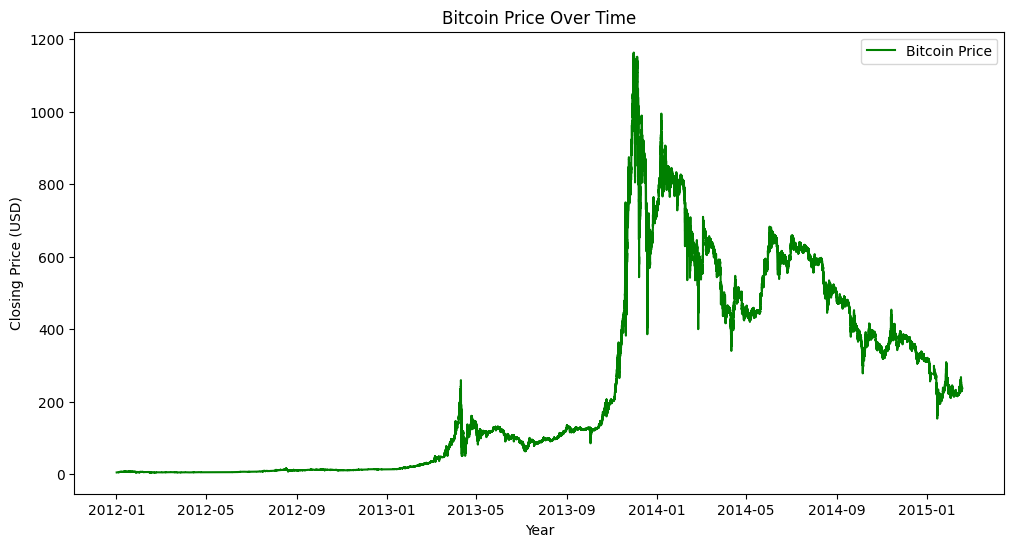

In [10]:
plt.figure(figsize=(12,6))
plt.plot(Bitcoin_df["Timestamp"], Bitcoin_df["Close"], label="Bitcoin Price", color="green")
plt.xlabel("Year")
plt.ylabel("Closing Price (USD)")
plt.title("Bitcoin Price Over Time")
plt.legend()
plt.show()


**Q2: What were the highest and lowest Bitcoin prices recorded?**

In [11]:
highest_price = Bitcoin_df["High"].max()
lowest_price = Bitcoin_df["Low"].min()
print(f"Highest Bitcoin Price: ${highest_price}")
print(f"Lowest Bitcoin Price: ${lowest_price}")


Highest Bitcoin Price: $1163.0
Lowest Bitcoin Price: $2.0


**Q3: Most Volatile Periods in Bitcoin History**

In [13]:
# Calculate Daily Price Change Percentage
Bitcoin_df["Daily_Change"] = Bitcoin_df["Close"].pct_change() * 100

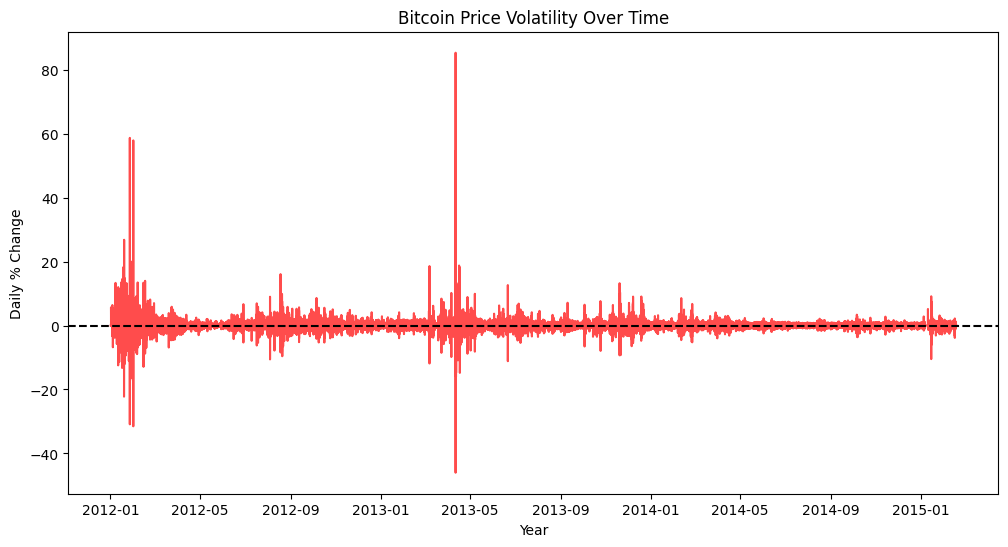

In [14]:
plt.figure(figsize=(12,6))
plt.plot(Bitcoin_df["Timestamp"], Bitcoin_df["Daily_Change"], color="red", alpha=0.7)
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Daily % Change")
plt.title("Bitcoin Price Volatility Over Time")
plt.show()


**2️⃣ Trading Volume & Market Activity**

**Q4: How does trading volume vary over time?**

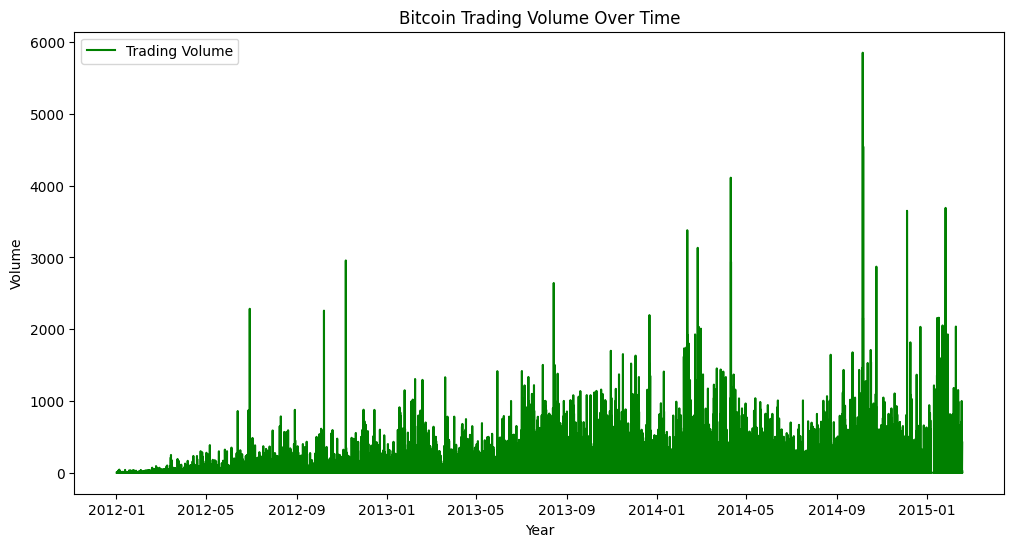

In [15]:
plt.figure(figsize=(12,6))
plt.plot(Bitcoin_df["Timestamp"], Bitcoin_df["Volume"], color="green", label="Trading Volume")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.title("Bitcoin Trading Volume Over Time")
plt.legend()
plt.show()


**Q5: Monthly & Yearly Trading Volume Analysis**

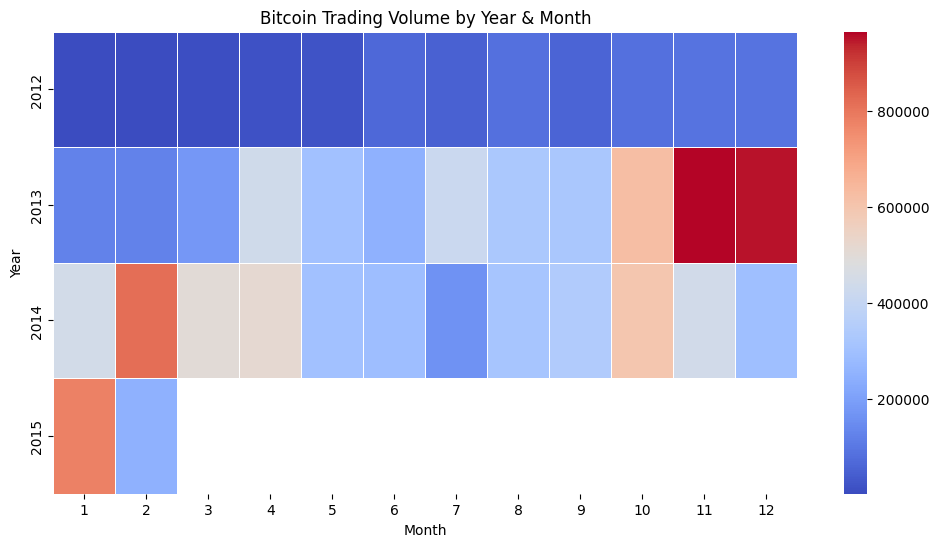

In [16]:
monthly_volume = Bitcoin_df.groupby(["Year", "Month"])["Volume"].sum().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(monthly_volume, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Bitcoin Trading Volume by Year & Month")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


**Q6: Trading Volume by Hour of the Day**

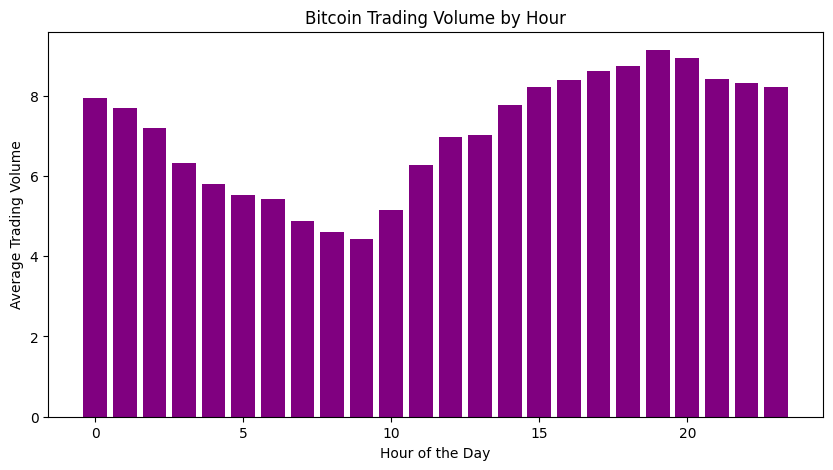

In [17]:
hourly_volume = Bitcoin_df.groupby("Hour")["Volume"].mean()

plt.figure(figsize=(10,5))
plt.bar(hourly_volume.index, hourly_volume.values, color="purple")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Trading Volume")
plt.title("Bitcoin Trading Volume by Hour")
plt.show()


**3️⃣ Seasonality & Patterns**

**Q7: Does Bitcoin price exhibit seasonal trends?**

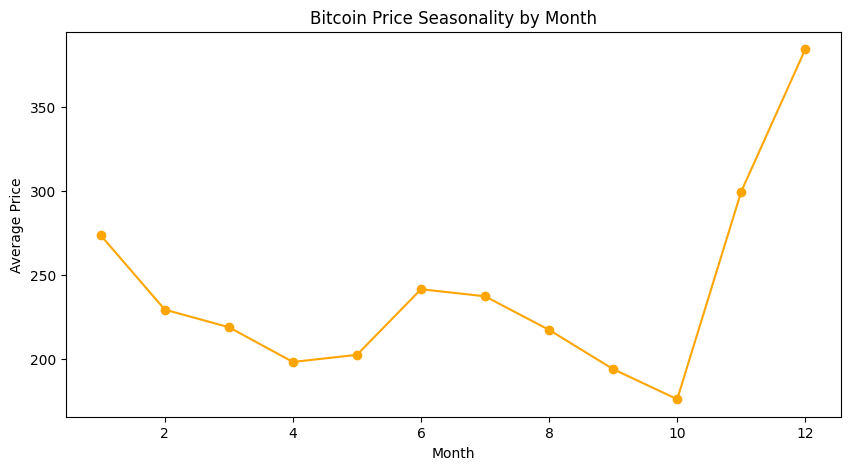

In [18]:
monthly_avg_price = Bitcoin_df.groupby("Month")["Close"].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_avg_price.index, monthly_avg_price.values, marker="o", color="orange")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Bitcoin Price Seasonality by Month")
plt.show()


**Q8: Correlation Between Price Change & Trading Volume**

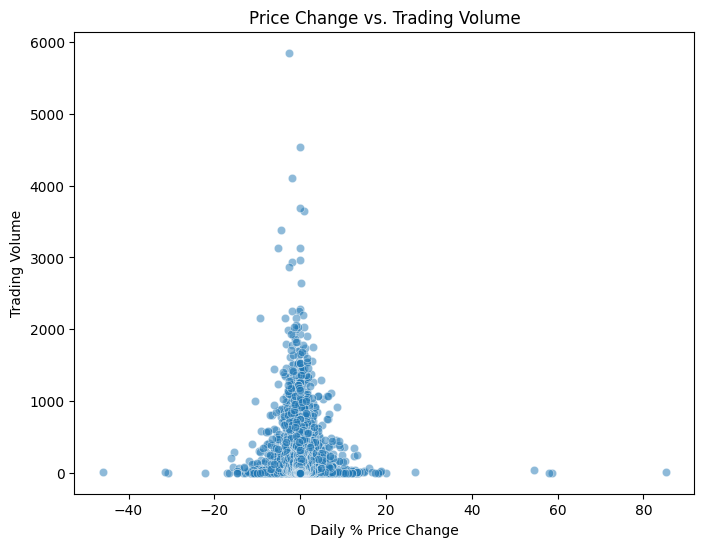

Correlation between price change and trading volume: -0.03


In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=Bitcoin_df["Daily_Change"], y=Bitcoin_df["Volume"], alpha=0.5)
plt.xlabel("Daily % Price Change")
plt.ylabel("Trading Volume")
plt.title("Price Change vs. Trading Volume")
plt.show()

correlation = Bitcoin_df["Daily_Change"].corr(Bitcoin_df["Volume"])
print(f"Correlation between price change and trading volume: {correlation:.2f}")


**Q9: Do certain days of the week have more price movements?**

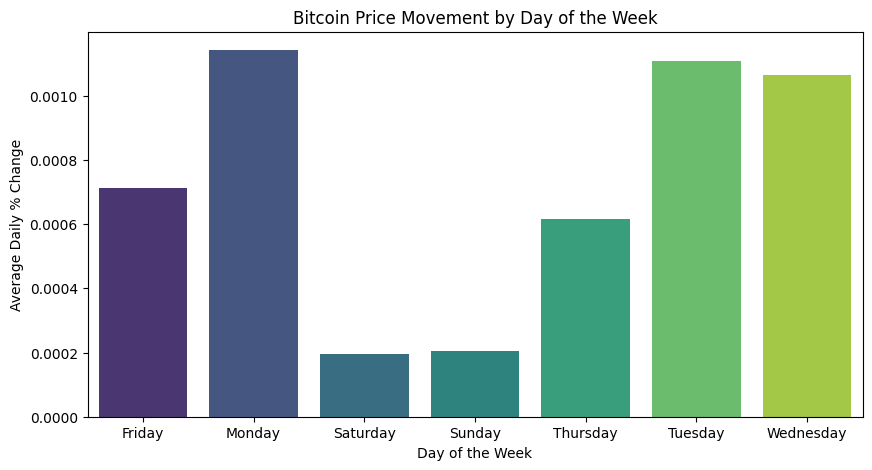

In [21]:
daily_changes_by_day = Bitcoin_df.groupby("DayOfWeek")["Daily_Change"].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=daily_changes_by_day.index, y=daily_changes_by_day.values, palette="viridis")
plt.xlabel("Day of the Week")
plt.ylabel("Average Daily % Change")
plt.title("Bitcoin Price Movement by Day of the Week")
plt.show()


**4️⃣ Extreme Events & Anomalies**

**Q10: Were there sudden crashes or price spikes?**

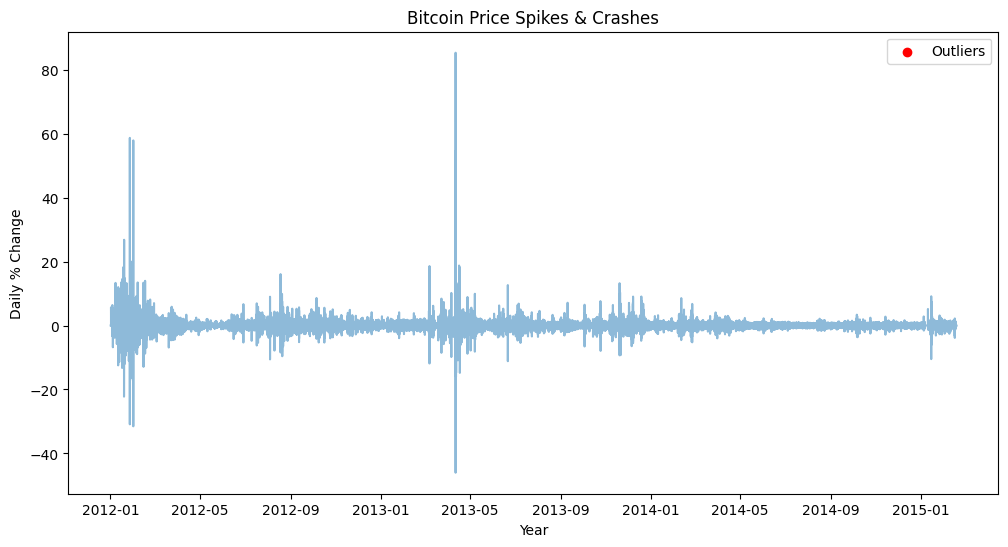

In [22]:
from scipy.stats import zscore

Bitcoin_df["Z_Score"] = zscore(Bitcoin_df["Daily_Change"])
outliers = Bitcoin_df[abs(Bitcoin_df["Z_Score"]) > 3]

plt.figure(figsize=(12,6))
plt.scatter(outliers["Timestamp"], outliers["Daily_Change"], color="red", label="Outliers")
plt.plot(Bitcoin_df["Timestamp"], Bitcoin_df["Daily_Change"], alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Daily % Change")
plt.title("Bitcoin Price Spikes & Crashes")
plt.legend()
plt.show()


**Q11: Top 5 Biggest Single-Day Gains & Losses**

In [23]:
top_gains = Bitcoin_df.nlargest(5, "Daily_Change")[["Timestamp", "Daily_Change"]]
top_losses = Bitcoin_df.nsmallest(5, "Daily_Change")[["Timestamp", "Daily_Change"]]

print("Top 5 Biggest Gains:")
print(top_gains)
print("\nTop 5 Biggest Losses:")
print(top_losses)


Top 5 Biggest Gains:
                 Timestamp  Daily_Change
671277 2013-04-11 14:58:00     85.320000
37258  2012-01-27 06:59:00     58.684211
44050  2012-02-01 00:11:00     57.894737
670301 2013-04-10 22:42:00     54.545455
26210  2012-01-19 14:51:00     26.811594

Top 5 Biggest Losses:
                 Timestamp  Daily_Change
671276 2013-04-11 14:57:00    -46.047047
44044  2012-02-01 00:05:00    -31.531532
37257  2012-01-27 06:58:00    -30.909091
25991  2012-01-19 11:12:00    -22.253521
37803  2012-01-27 16:04:00    -17.081260


**Q12: Price Trends by Time of Day**

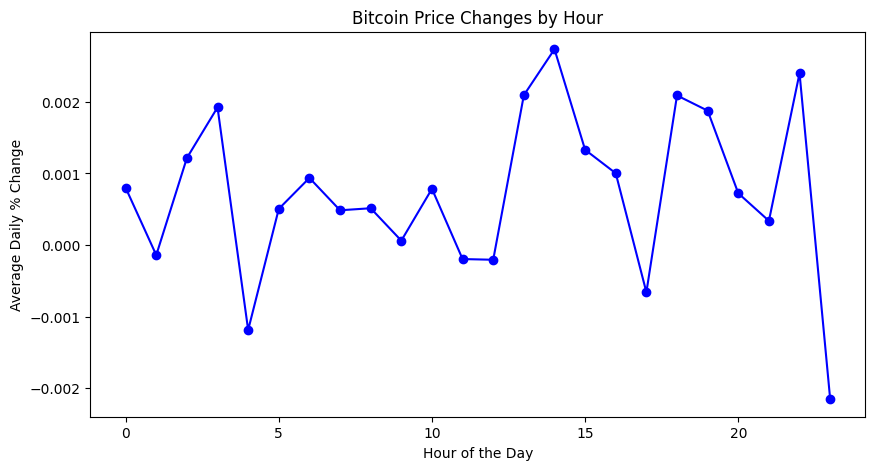

In [24]:
hourly_avg_price_change = Bitcoin_df.groupby("Hour")["Daily_Change"].mean()

plt.figure(figsize=(10,5))
plt.plot(hourly_avg_price_change.index, hourly_avg_price_change.values, marker="o", color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Daily % Change")
plt.title("Bitcoin Price Changes by Hour")
plt.show()


**5️⃣ Comparisons & Correlations**

**Q13: Correlation Between Open, High, Low, Close Prices**

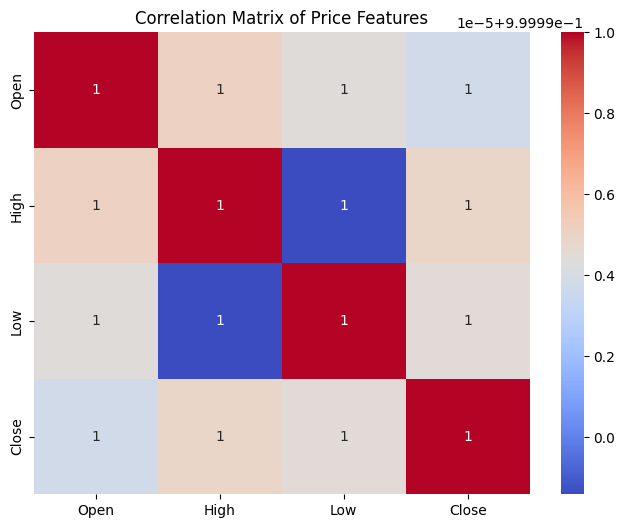

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(Bitcoin_df[["Open", "High", "Low", "Close"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Price Features")
plt.show()


**Q14: Does Trading Volume Impact Price Changes?**

In [26]:
volume_correlation = Bitcoin_df["Volume"].corr(Bitcoin_df["Daily_Change"])
print(f"Correlation between trading volume and price change: {volume_correlation:.2f}")


Correlation between trading volume and price change: -0.03


**Q15: Are There Outlier Transactions with High Volume?**

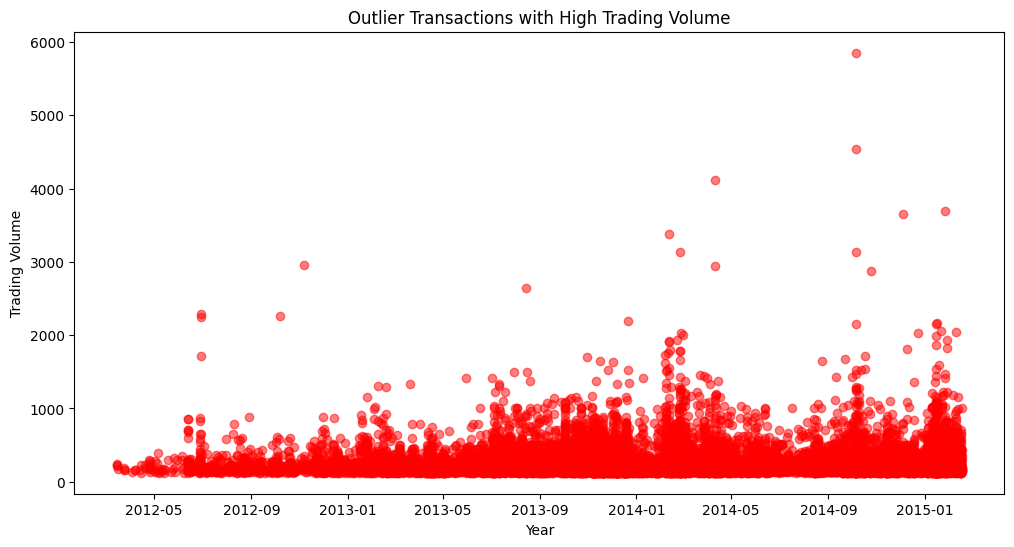

In [27]:
high_volume_outliers = Bitcoin_df[Bitcoin_df["Volume"] > Bitcoin_df["Volume"].quantile(0.99)]
plt.figure(figsize=(12,6))
plt.scatter(high_volume_outliers["Timestamp"], high_volume_outliers["Volume"], color="red", alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Trading Volume")
plt.title("Outlier Transactions with High Trading Volume")
plt.show()
